# Master Notebook for Plotting

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.patches as mpatches

# Data Files

consumer = "Govt_Data/consumer_sentiment.csv"
interest = "Govt_Data/Interest_rates.csv"
UE = "Govt_Data/Unemployment.csv"

auto_stocks = "Stock_Data/Auto_stock_data.csv"
SP = "Stock_Data/Stock_Data.csv"
car_sales = "Car_sales_Data/Car_data.csv"
autogroup_marketshare = "Car_sales_Data/Autogroup_marketshare_est.csv"



# Read the files
customer_df = pd.read_csv(consumer)
interest_df = pd.read_csv(interest)
UE_df = pd.read_csv(UE)

# Read the data 
autostocks_data = pd.read_csv(auto_stocks)  # Auto stocks daily price data for 2019 and 2020
SP_data = pd.read_csv(SP)   # S&P daily price data for 2019 and 2020
car_sales_data = pd.read_csv(car_sales)  # Avg car brand sales price for grouping
AG_marketshare_data = pd.read_csv(autogroup_marketshare)  # Avg Auto Group marketshare for grouping


# Car Sales Data

### Plot Car Sales Data

# Consumer Sentiment

In [6]:
# Remove unnecessary columns from source dataframe
customer_df = customer_df.drop(['Good Time<br>Prices are Low','Good Time<br>Prices will increase',
                                'Good Time<br>Interest rates low','Good Time<br>Rising interest rates',
                                'Good Time<br>Fuel Efficiency', 'Bad Time<br>Prices High', 'Bad Time<br>Interest rates high',
                                "Bad Time<br>Can't Afford",'Bad Time<br>Gas Prices','Bad Time<br>Poor Selection','Relative: prices',
                                'Relative: rates'],axis=1)
# Remove data beyond the end of the 3Q 2020 starting at 2019-01-01
customer_df = customer_df[customer_df['Date'] >= '2019-01-01']
customer_df = customer_df[customer_df['Date'] <= '2020-10-01']
#Sort values from 2019-01-01 to 2020-10-01
customer_df = customer_df.sort_values('Date')

In [9]:
# Historical points as markers
# Group by Date to create df for historical markers.
CSI = customer_df.groupby(['Date']).sum()

dates = ["2020-03-31","2020-05-31"]
def find_loc(CSI, dates):
    marks = []
    for date in dates:
        marks.append(CSI.index.get_loc(date))
    return marks

### Plot Uncertain Future

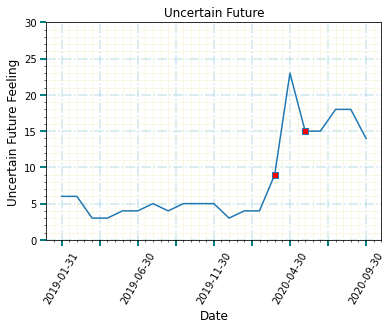

In [10]:
#Bad Time<br>Uncertain Future

# Line chart selection
customer_df.plot.line(x='Date', y='Bad Time<br>Uncertain Future', legend = False, rot=60, title="Uncertain Future",
                      markevery=find_loc(CSI, dates), marker='s', markerfacecolor='red')


# Sets the y limits
plt.ylim(0, 30)

# Provides labels
plt.xlabel("Date", fontsize=12)
plt.ylabel("Uncertain Future Feeling", fontsize=12)

plt.tick_params(axis='both', direction='out', length=6, width=2, labelcolor = 'black',colors='teal')

# Major grid lines
plt.grid(b=True, which='major', color='lightblue', alpha=0.6, linestyle='dashdot', lw=1.5)

# Minor grid lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='beige', alpha=0.8, ls='-', lw=1)

# Save the figure as .png
#plt.savefig('Images/Interest Rates.png')

plt.show(block=True)

# Unemployment

In [11]:
# Remove unnecessary columns from source dataframe
UE_data = UE_df.drop(['Men, 20 years and over','Women, 20 years and over','16 to 19 years old','White','Black or African American','Asian','Hispanic or Latino'],axis=1)

# Rename column
UE_data = UE_data.rename(columns={'Month': 'Date','Total':'Rate (%)'})

# Remove Unemployment data beyond the end of the 3Q 2020
UE_data['Date'] = pd.to_datetime(UE_data['Date'])

UE_data = UE_data[UE_data['Date'] >= '1/1/2019']
UE_data = UE_data[UE_data['Date'] <= '10/1/2020']

# Historical points as markers
# Group by Date to create df for historical markers.
UEI = UE_data.groupby(['Date']).sum()

dates = ["2020-04-01","2020-06-01"]
def find_loc(UEI, dates):
    marks = []
    for date in dates:
        marks.append(UEI.index.get_loc(date))
    return marks

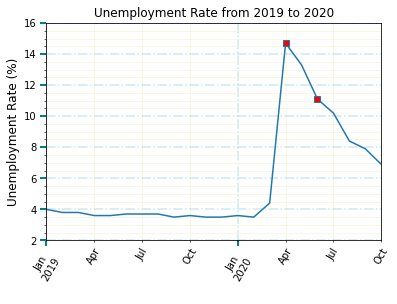

In [12]:
# Unemployment trend line
minvalue = UE_data.loc[UE_data['Rate (%)'].idxmin()]  # Min price for Y-axis
#print(minvalue)
maxvalue = UE_data.loc[UE_data['Rate (%)'].idxmax()]  # Max price for Y-axis
#print(maxvalue)

# Line chart selection
UE_data.plot.line(x='Date', y='Rate (%)', legend = False, rot=60, title="Unemployment Rate from 2019 to 2020",markevery=find_loc(UEI, dates), marker='s', markerfacecolor='red');

# Sets the y limits
plt.ylim(2, 16)

# Provides labels
plt.xlabel(" ")
plt.ylabel("Unemployment Rate (%)", fontsize=12)

# Format tick marks
plt.tick_params(axis='both', direction='out', length=6, width=2, labelcolor = 'black',colors='teal')

# Major grid lines
plt.grid(b=True, which='major', color='lightblue', alpha=0.6, linestyle='dashdot', lw=1.5)

# Minor grid lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='beige', alpha=0.8, ls='-', lw=1)

# Save the figure as .png
plt.savefig('Images/Unemployment_Rate.png')

plt.show(block=True)

# Interest rates

In [13]:
#Convert DATE to datetime
interest_df['DATE'] = pd.to_datetime(interest_df['DATE'])

# Discard data for Q4 2020
interest_df = interest_df[interest_df['DATE'] <= '10/1/2020']

#Sort values by date 
interest_sorted = interest_df.sort_values('DATE')



#### Plot Interest rates 52 weeks

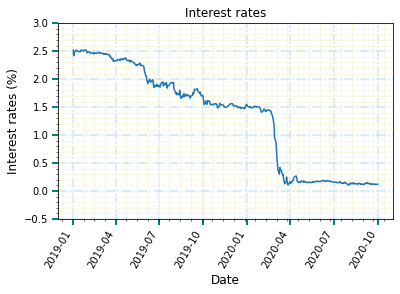

In [14]:
# 52 wk BANK DISCOUNT

# Line chart selection
interest_sorted.plot.line(x='DATE', y='52 wk BANK DISCOUNT', legend = False, rot=60, title="Interest rates",)
#                          marker='s', markerfacecolor='red');

# Sets the y limits
plt.ylim(-0.5, 3)

# Provides labels
plt.xlabel("Date", fontsize=12)
plt.ylabel("Interest rates (%)", fontsize=12)

plt.tick_params(axis='both', direction='out', length=6, width=2, labelcolor = 'black',colors='teal')

# Major grid lines
plt.grid(b=True, which='major', color='lightblue', alpha=0.6, linestyle='dashdot', lw=1.5)

# Minor grid lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='beige', alpha=0.8, ls='-', lw=1)

# Save the figure as .png
#plt.savefig('Images/Interest Rates.png')

plt.show(block=True)

# Covid


### Plot Covid Data

# Stock Data

# Plot Stock Data